<a href="https://colab.research.google.com/github/ikramooe/DataScience-1/blob/master/Cats_Vs_Dogs_Mini_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip
  

--2019-05-25 14:29:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.26.16, 2404:6800:4004:801::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.26.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  51.7MB/s    in 1.3s    

2019-05-25 14:29:34 (51.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import requests
import zipfile
import os 

In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/cats_and_dogs_filtered')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')


train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')


validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

train_cats_names = os.listdir(train_cats_dir)
train_dogs_names = os.listdir(train_dogs_dir)


print(train_cats_names[:10])
print(train_dogs_names[:10])

['cat.185.jpg', 'cat.910.jpg', 'cat.588.jpg', 'cat.5.jpg', 'cat.702.jpg', 'cat.25.jpg', 'cat.343.jpg', 'cat.335.jpg', 'cat.629.jpg', 'cat.40.jpg']
['dog.644.jpg', 'dog.434.jpg', 'dog.105.jpg', 'dog.927.jpg', 'dog.561.jpg', 'dog.805.jpg', 'dog.535.jpg', 'dog.246.jpg', 'dog.532.jpg', 'dog.186.jpg']


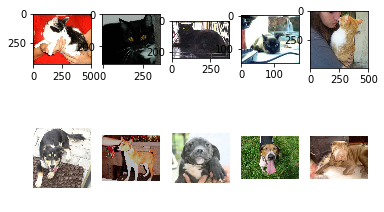

total number of cats : 1000
total number of dogs: 1000
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
fig , axarr = plt.subplots(2,5)
img_cat = [os.path.join(train_cats_dir , fname)
          for fname in train_cats_names[:5]
          ]
img_dog = [os.path.join(train_dogs_dir , fname)
          for fname in train_dogs_names[5:10]
          ]

for img_path in enumerate(img_cat):
  i = img_path[0]
  x=mpimg.imread(img_path[1])
  axarr[0][i].imshow(x)
  axarr[0][i].grid=False
  
for img_path in enumerate(img_dog):
  i = img_path[0]
  x=mpimg.imread(img_path[1])
  axarr[1][i].imshow(x)
  axarr[1][i].grid=False
  axarr[1][i].axis('Off')
  plt.imshow(x)

plt.show()

print("total number of cats :",len(os.listdir(train_cats_dir)))
print("total number of dogs:",len(os.listdir(train_dogs_dir)))


train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
     '/tmp/cats_and_dogs_filtered/train',
      target_size=(150,150),
      batch_size=20,
      class_mode='binary')



test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
      '/tmp/cats_and_dogs_filtered/validation',
      target_size=(150,150),
      class_mode='binary',
      batch_size=20)






In [0]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

history = model.fit_generator(

   train_generator,

   steps_per_epoch=100,

   epochs=15,

   validation_data = test_generator,

   validation_steps=8)




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
100/100 [==============================] - 11s 114ms/step - loss: 0.7018 - acc: 0.5510 - val_loss: 0.6503 - val_acc: 0.6260
Epoch 2/15
100/100 [==============================] - 9s 88ms/step - loss: 0.6355 - acc: 0.6435 - val_loss: 0.6198 - val_acc: 0.6610
Epoch 3/15
100/100 [==============================] - 9s 88ms/step - loss: 0.5724 - acc: 0.7105 - val_loss: 0.6059 - val_acc: 0.6570
Epoch 4/15
100/100 [==============================] - 9s 88ms/step - loss: 0.5092 - acc: 0.7550 - val_loss: 0.6420 - val_acc: 0.6850
Epoch 5/15
100/100 [==============================] - 9s 88ms/step - loss: 0.4369 - acc: 0.8040 - val_loss: 0.6594 - val_acc: 0.6870
Epoch 6/15
100/100 [==============================] - 9s 94ms/step - loss: 0.3553 - acc: 0.8395 - val_loss: 0.6922 - val_acc: 0.6890
Epoch 7/15
100/100 [==============================] - 10s 95ms/step - loss: 0.24

In [0]:

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
    
    
    
    

Using TensorFlow backend.


Saving animal-339400_1280.jpg to animal-339400_1280.jpg
[[1.]]
animal-339400_1280.jpg is a dog


Text(0.5, 1.0, 'training and testing loss')

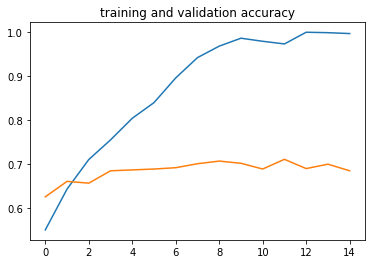

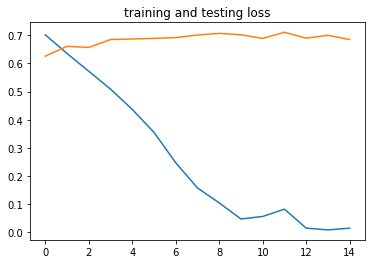

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss = history.history['val_acc']

epochs= range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title("training and validation accuracy")


plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("training and testing loss")







In [0]:



# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
     
 
      

train_generator = train_datagen.flow_from_directory(
     '/tmp/cats_and_dogs_filtered/train',
      target_size=(150,150),
      batch_size=20,
      class_mode='binary')




test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
      '/tmp/cats_and_dogs_filtered/validation',
      target_size=(150,150),
      class_mode='binary',
      batch_size=20)



model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

history = model.fit_generator(

   train_generator,

   steps_per_epoch=100,

   epochs=20,

   validation_data = test_generator,

   validation_steps=8)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 17s 173ms/step - loss: 0.5379 - acc: 0.7270 - val_loss: 0.5164 - val_acc: 0.7400
Epoch 2/20
100/100 [==============================] - 16s 164ms/step - loss: 0.5477 - acc: 0.7275 - val_loss: 0.5108 - val_acc: 0.7460
Epoch 3/20
100/100 [==============================] - 16s 165ms/step - loss: 0.5319 - acc: 0.7365 - val_loss: 0.5512 - val_acc: 0.7250
Epoch 4/20
100/100 [==============================] - 17s 168ms/step - loss: 0.5137 - acc: 0.7450 - val_loss: 0.4894 - val_acc: 0.7640
Epoch 5/20
100/100 [==============================] - 17s 174ms/step - loss: 0.5087 - acc: 0.7530 - val_loss: 0.5554 - val_acc: 0.7200
Epoch 6/20
100/100 [==============================] - 17s 165ms/step - loss: 0.5142 - acc: 0.7520 - val_loss: 0.4867 - val_acc: 0.7590
Epoch 7/20
100/100 [==============================] - 17s 174ms/step - loss: 0.5133 - acc: 0.7465 - val_lo

Text(0.5, 1.0, 'training and testing loss')

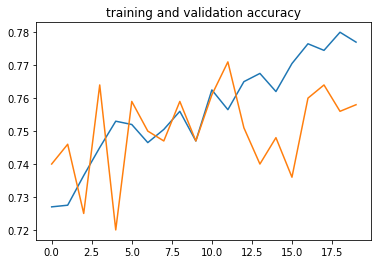

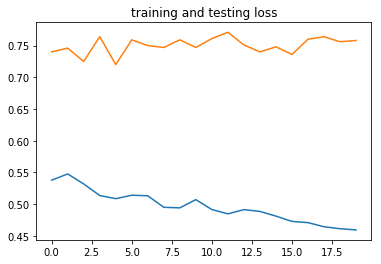

In [0]:
 
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss = history.history['val_acc']

epochs= range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title("training and validation accuracy")


plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("training and testing loss")




In [0]:
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
    
    
    
    

Saving animal-339400_1280.jpg to animal-339400_1280 (1).jpg
[[1.]]
animal-339400_1280.jpg is a dog
